In [1]:
import pandas as pd
import numpy as np

from spn import LogicalArithmeticSPN
from spn.laspn import sort_dataset, generate_total_significant_mindices, generate_significant_mindices
from spn.laspn import save_all_mindices, read_all_mindices

In [2]:
def read_letter(f, c):
    data = []
    nl = 0
    while True:
        line = f.readline().strip()
        if len(line) <= 2:
            next_c = line
            break
        m = len(line)
        if m > 8:
            raise TypeError("{0}: длина строки больше 8".format(c))
        row = tuple([(1 if x == '*' else 0) for x in line])
        if len(row) != 8:
            raise TypeError("{0}: длина != 8".format(c))
        data.append(row)
        nl += 1
    if nl != 8:
        raise TypeError("{0}: высота != 8".format(c))
    return data, next_c

def flatten_data(data):
    t = ()
    for d in data:
        t = t + d
    return t

def read_letters():
    f = open('data/letters8.txt', 'rt', encoding='utf-8')
    Y = []
    X = []
    d = {}
    line = f.readline().strip()
    c = line[0]
    while True:
        if c == '##':
            break
        data, next_c = read_letter(f, c)
#         lst = d.setdefault(c, [])
        data = flatten_data(data)
#         lst.append(data)
        Y.append(c)
        X.append(data)
        c = next_c
    f.close()
    return X, Y

In [3]:
X, Y = read_letters()

In [4]:
X, Y = sort_dataset(X, Y)
print(len(X), len(Y))

252 252


In [5]:
C = list(np.unique(Y))

YY = {}
N = len(X)
for c in C:
    Yc = []
    for y in Y:
        if y == c:
            Yc.append(1)
        else:
            Yc.append(0)
    YY[c] = Yc

In [6]:
for k, Xk in enumerate(X):
    print('%.3i' % k, ''.join(str(x) for x in Xk))

000 0000000000000000000000000000000000011000001001000100001010000001
001 0000000000000000000000000000000000111100001001000010010000100100
002 0000000000000000000000000000000000111100010000100100001001000010
003 0000000000000000000000000001100000100100010000101000000110000001
004 0000000000000000000000001110000010010000111000001000000010000000
005 0000000000000000000000000111111100001000000010000000100000001000
006 0000000000000000000000001111111000010000000100000001000000010000
007 0000000000000000000000000000000001111110010000100100001001000010
008 0000000000000000000000000000000001111110100000011000000110000001
009 0000000000000000000000000011110001000010010000100100001001000010
010 0000000000000000000000001111000010010000111100001000000010000000
011 0000000000000000000000001111111110000000100000001000000010000000
012 0000000000000000000110000010010001000010100000011000000110000001
013 0000000000000000011111110000100000001000000010000000100000001000
014 000000000000000011111110000100

In [7]:
h = open("letters_all_mis.txt", "wt")
MI = []
for mis in generate_significant_mindices(X):
    MI.append(mis)
    h.write(repr(mis) + "\n")
h.close()

0 1
1 1
2 1
3 1
4 2
5 1
6 1
7 1
8 1
9 2
10 2
11 2
12 2
13 1
14 2
15 3
16 2
17 1
18 2
19 2
20 2
21 2
22 2
23 2
24 2
25 3
26 2
27 2
28 2
29 2
30 2
31 2
32 3
33 3
34 2
35 3
36 3
37 2
38 2
39 2
40 3
41 3
42 4
43 3
44 3
45 2
46 2
47 2
48 2
49 3
50 3
51 2
52 2
53 3
54 2
55 2
56 2
57 4
58 3
59 3
60 18
61 3
62 5
63 2
64 3
65 3
66 3
67 3
68 4
69 3
70 18
71 3
72 3
73 3
74 3
75 3
76 2
77 3
78 5
79 3
80 2
81 2
82 3
83 4
84 4
85 3
86 3
87 3
88 2
89 3
90 5
91 3
92 3
93 3
94 2
95 3
96 3
97 4
98 3
99 3
100 3
101 3
102 2
103 4
104 3
105 3
106 3
107 3
108 3
109 3
110 3
111 3
112 3
113 3
114 3
115 4
116 4
117 4
118 4
119 4
120 3
121 4
122 4
123 3
124 3
125 3
126 3
127 3
128 3
129 3
130 3
131 4
132 5
133 4
134 4
135 4
136 4
137 4
138 4
139 4
140 4
141 3
142 4
143 3
144 4
145 3
146 4
147 3
148 3
149 3
150 4
151 4
152 3
153 3
154 4
155 3
156 4
157 4
158 4
159 4
160 3
161 3
162 4
163 3
164 3
165 3
166 3
167 3
168 3
169 3
170 24
171 5
172 4
173 4
174 4
175 2
176 3
177 4
178 5
179 4
180 4
181 4
182 4
183 4
184

In [8]:
print(YY['А'])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
spn = LogicalArithmeticSPN()
spn.fit(X, YY['А'], mindices=MI, is_sorted=True)

In [13]:
print(spn.mindices)
print(spn.weights)

[(63,), (61,), (62,), (42, 48), (60,), (59,), (31, 56), (28, 49, 56), (23, 56), (15, 56), (7, 48), (49, 51), (29, 34), (22, 37, 40), (26, 38, 39, 56), (22, 38, 39, 56), (22, 30, 39), (26, 32, 38, 63), (33, 39, 46), (25, 38, 56, 63), (46, 54, 56, 63), (25, 46, 47), (14, 31, 38)]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, 3, 2, -5, 6, 5, -4, -4, 3]


In [16]:
spn.evaluate_all(X) == YY['А']

True

In [17]:
from IPython import display
text = r'\begin{eqnarray}'
text += r"\mathrm{spn} &=& %s\\" % (spn.latex()[1:-1])
text += r'\end{eqnarray}'
display.Latex(text)


<IPython.core.display.Latex object>

In [18]:
import networkx as nx

In [19]:
def plot_spn_digraph(spn):
    g = nx.DiGraph()

    x_list = []
    P_list = []

    edge_labels ={}
    
    m = len(spn.mindices)
    for i in range(m):
        P = 'P'+str(i+1)
        if P not in P_list:
            P_list.append(P)

        mi = spn.mindices[i]
        for t in mi:
            x = 'x'+str(t+1)
            if x not in x_list:
                x_list.append(x)
            key = (x, P)
            g.add_edge(*key)

        S = 'S'
        g.add_edge(P, S)
        key = (P, S)
        g.add_edge(*key)
        edge_labels[key] = spn.weights[i]
        H = 'H'
        g.add_edge(S, H)
        y = 'y'
        g.add_edge(H, y)

    node_colors = []
    for node in g.nodes:
        c = node[0]
        if c == 'x':
            node_colors.append('gray')
        elif c == 'P':  
            node_colors.append('g')
        elif c == 'S':  
            node_colors.append('b')
        elif c == 'H':  
            node_colors.append('m')
        elif c == 'y':  
            node_colors.append('gray')
            
    ax = plt.gca()
    pos = nx.drawing.layout.shell_layout(g, nlist=[x_list, P_list, ['S'], ['H'], ['y']], center=(0,0))
    nx.draw_networkx(g, pos=pos, with_label=True, arrows=True, ax=ax, 
                     node_color=node_colors)
    nx.draw_networkx_edge_labels(g, pos=pos, ax=ax, edge_labels=edge_labels)
#     ax.legend()
            

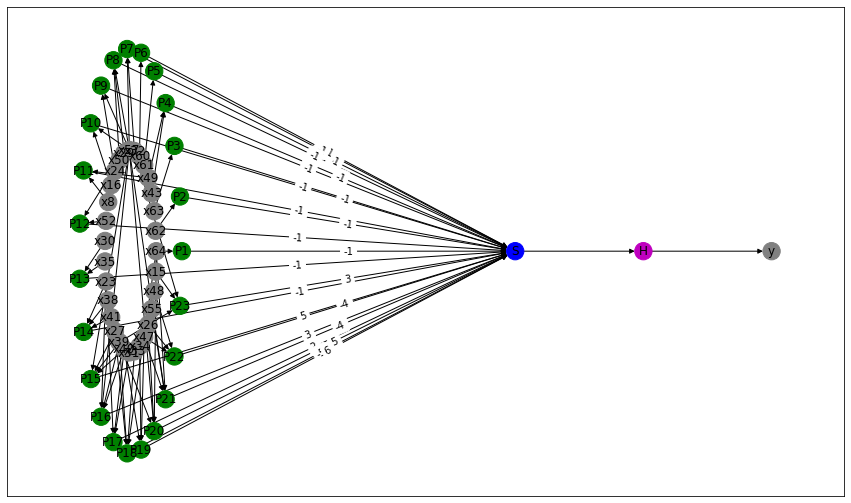

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
plot_spn_digraph(spn)
plt.savefig("letter8_А.jpg")